# I2DS Assignment 3 - Clustering

# 1 Find a Dataset
This dataset is from kaggle: https://www.kaggle.com/datasets/synful/world-happiness-report

And contains information about the happiness, economy, governmental trust of countries

The majority of this code was taken from the Week-6-Clustering-With-K-means Jupyter notebook (https://git.arts.ac.uk/tbroad/Intro-2-DS-22-23/blob/main/Week-6-Clustering-With-K-Means.ipynb) by Terry. 

In [2]:
import random, os, sys, shutil
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("\\Users\\Sadie Nathan\\Documents\\GitHub\\I2DS-Assignments\\World_Happiness-2015.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [5]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [6]:
df.isna().any()

Country                          False
Region                           False
Happiness Rank                   False
Happiness Score                  False
Standard Error                   False
Economy (GDP per Capita)         False
Family                           False
Health (Life Expectancy)         False
Freedom                          False
Trust (Government Corruption)    False
Generosity                       False
Dystopia Residual                False
dtype: bool

In [7]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\Sadie Nathan\AppData\Local\Temp\ipykernel_18004\2001914525.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.00,-0.99,0.16,-0.79,-0.73,-0.74,-0.56,-0.37,-0.16,-0.52
Happiness Score,-0.99,1.00,-0.18,0.78,0.74,0.72,0.57,0.40,0.18,0.53
Standard Error,0.16,-0.18,1.00,-0.22,-0.12,-0.31,-0.13,-0.18,-0.09,0.08
Economy (GDP per Capita),-0.79,0.78,-0.22,1.00,0.65,0.82,0.37,0.31,-0.01,0.04
Family,-0.73,0.74,-0.12,0.65,1.00,0.53,0.44,0.21,0.09,0.15
Health (Life Expectancy),-0.74,0.72,-0.31,0.82,0.53,1.00,0.36,0.25,0.11,0.02
Freedom,-0.56,0.57,-0.13,0.37,0.44,0.36,1.00,0.49,0.37,0.06
Trust (Government Corruption),-0.37,0.40,-0.18,0.31,0.21,0.25,0.49,1.00,0.28,-0.03
Generosity,-0.16,0.18,-0.09,-0.01,0.09,0.11,0.37,0.28,1.00,-0.10
Dystopia Residual,-0.52,0.53,0.08,0.04,0.15,0.02,0.06,-0.03,-0.10,1.00


## 2
Pick some variables and visualise it as a 2D plot using PCA. Does there appear to be clear groups?

First I'm going to put the entire dataset through the clusting process, to skip go down to where it says 'Specific Variable Clustering'

In [8]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [9]:
x = df
x = x.drop("Country", axis=1)
x = x.drop("Happiness Rank", axis=1)
x = x.drop("Region", axis=1)
x #removing non-numeric data

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


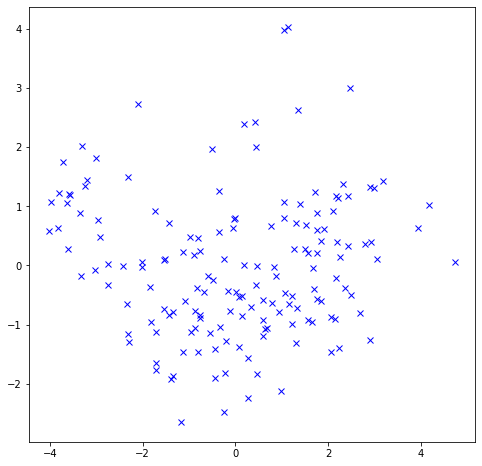

In [10]:
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
x_2d = pca.fit_transform(x)
plt.figure(figsize=(8, 8))
a = plt.plot(x_2d[:,0],x_2d[:,1],"bx")

Though there aren't what I would interpret as clear groups I do think that there is some general groupings of datapoints. 

## Specific Variable Clustering
#### Economy, Life Expectancy
As to not labor the point with the most of these next plots there is some evidence of a pattern but nothing I would define as clear clustering.

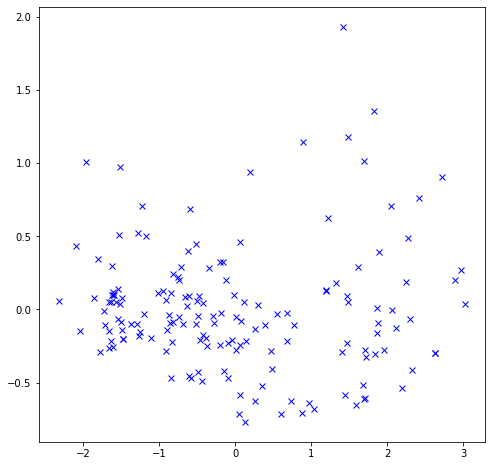

In [11]:
x = df
x = x.drop("Country", axis=1)
x = x.drop("Happiness Rank", axis=1)
x = x.drop("Region", axis=1)
x = x[['Economy (GDP per Capita)', 'Health (Life Expectancy)']] #removing non-numeric data
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
x_2d = pca.fit_transform(x)
plt.figure(figsize=(8, 8))
a = plt.plot(x_2d[:,0],x_2d[:,1],"bx")

There does appear to be some clustering of the data, though the clusters aren't tight or particularly separate. 

#### Family, Life Expectancy

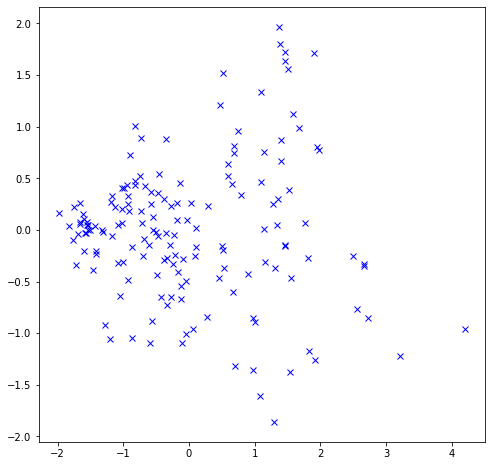

In [12]:
x = df
x = x.drop("Country", axis=1)
x = x.drop("Happiness Rank", axis=1)
x = x.drop("Region", axis=1)
x = x[['Family', 'Health (Life Expectancy)']] #removing non-numeric data
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
x_2d = pca.fit_transform(x)
plt.figure(figsize=(8, 8))
a = plt.plot(x_2d[:,0],x_2d[:,1],"bx")

The clustering in the plot suggests that there are similarities between those with smaller families having more similar lifespans, though there aren't clear groupings that would suggest particular trends. 

#### Happiness Score, Life Expectancy

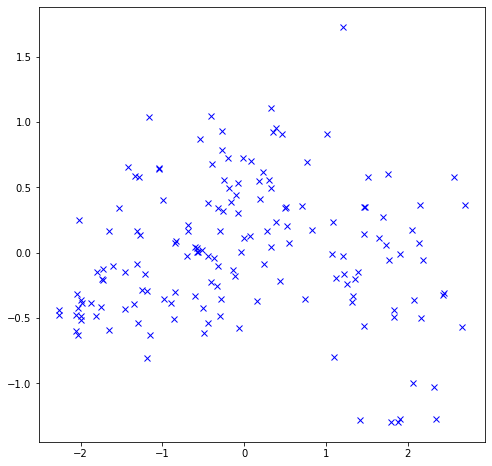

In [13]:
x = df
x = x.drop("Country", axis=1)
x = x.drop("Happiness Rank", axis=1)
x = x.drop("Region", axis=1)
x = x[['Happiness Score', 'Health (Life Expectancy)']] #removing non-numeric data
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
x_2d = pca.fit_transform(x)
plt.figure(figsize=(8, 8))
a = plt.plot(x_2d[:,0],x_2d[:,1],"bx")

#### Happiness, Life Expectancy, Government Corruption

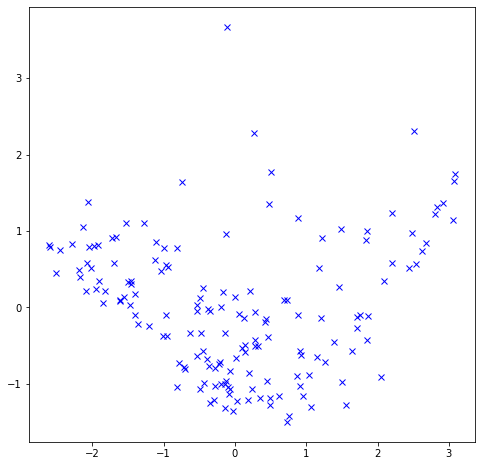

In [14]:
x = df
x = x.drop("Country", axis=1)
x = x.drop("Happiness Rank", axis=1)
x = x.drop("Region", axis=1)
x = x[['Happiness Score', 'Health (Life Expectancy)', 'Trust (Government Corruption)']] #removing non-numeric data
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
x_2d = pca.fit_transform(x)
plt.figure(figsize=(8, 8))
a = plt.plot(x_2d[:,0],x_2d[:,1],"bx")

#### Happiness, Freedom

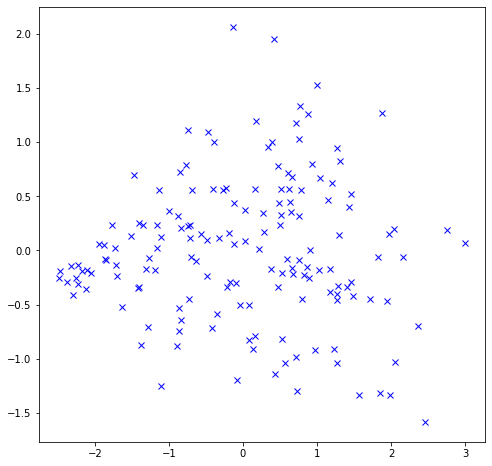

In [15]:
x = df
x = x.drop("Country", axis=1)
x = x.drop("Happiness Rank", axis=1)
x = x.drop("Region", axis=1)
x = x[['Happiness Score', 'Freedom']] #removing non-numeric data
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
x_2d = pca.fit_transform(x)
plt.figure(figsize=(8, 8))
a = plt.plot(x_2d[:,0],x_2d[:,1],"bx")

Again, all of the plots above show some signs of clustering but none of the clusters are specifically clear or specific. The take aways are fairly broad assumptions. In terms of which performs best, I think it is difficult to say as none of the clustering is particularly specific, though the family and life expectancy do show some promise in terms of clustering. 

## 3
Run either k-means clustering or clustering with a Gaussian Mixture Model (GMM) and visualise the results. Experiment with some of the things below. It may be that you iterate between this and step 4 a few times, investigating how your clusters are and updating your parameters / dataset.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


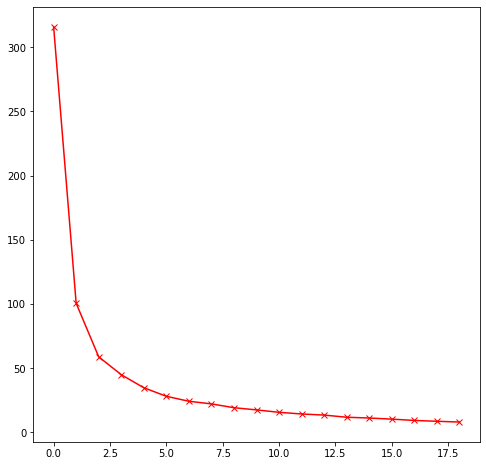

In [16]:
x = df
x = x.drop("Country", axis=1)
x = x.drop("Happiness Rank", axis=1)
x = x.drop("Region", axis=1)
x = x[['Economy (GDP per Capita)', 'Health (Life Expectancy)']] #removing non-numeric data
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
x_2d = pca.fit_transform(x)
plt.figure(figsize=(8, 8))
#a = plt.plot(x_2d[:,0],x_2d[:,1],"bx")


def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='r', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_clusters(clusterer, X):
    labels = clusterer.predict(X)
    pca = PCA(n_components=2)
    x_2d = pca.fit_transform(X)
    plt.scatter(x_2d[:, 0], x_2d[:, 1], c=labels, alpha=0.3)
    plot_centroids(clusterer.cluster_centers_)
    
scores=[]
for i in range(1,20):
    #Fit for k
    means=KMeans(n_clusters=i)
    means.fit(x)
    #Get inertia
    scores.append(means.inertia_)
plt.plot(scores,"-rx")

From this elbow plot I would say that the number of clusters that best fits this data would be k=2. Below shows 3 graphs with several different k values to see how this affects the plots. 

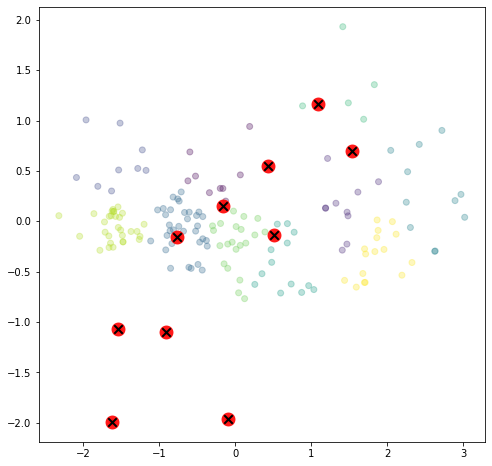

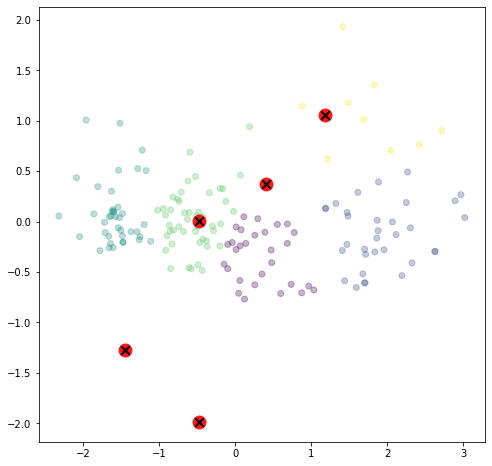

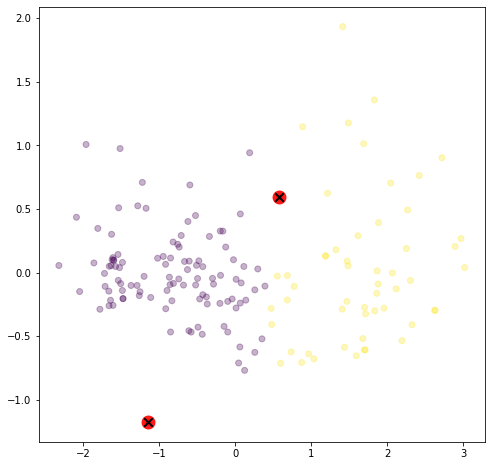

In [17]:
k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x)
plt.figure(figsize=(8, 8))
#Plot clusters onto PCA reduced plot
plot_clusters(kmeans, x)

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x)
plt.figure(figsize=(8, 8))
#Plot clusters onto PCA reduced plot
plot_clusters(kmeans, x)

k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x)
plt.figure(figsize=(8, 8))
#Plot clusters onto PCA reduced plot
plot_clusters(kmeans, x)

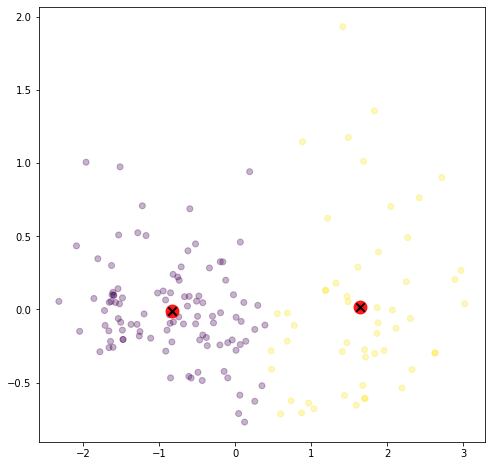

In [18]:
num_dimensions = 2

#Reduce dimensions
pca = PCA(n_components=num_dimensions)
x_less_dimensions = pca.fit_transform(x)

#Fit cluster
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_less_dimensions)

#Plot results on 2D plot
plt.figure(figsize=(8, 8))
plot_clusters(kmeans, x_less_dimensions)

Text(0.5, 0, 'cluster number')

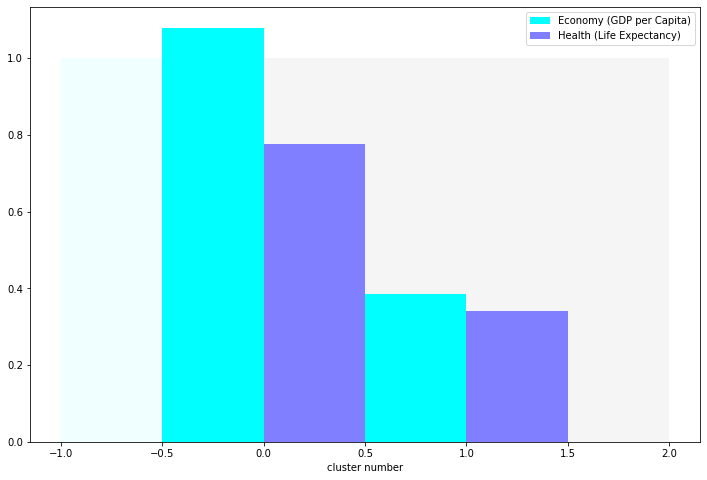

In [19]:
labels = kmeans.predict(x_less_dimensions)
df["cluster"] = labels

#Pick some features to plot
features = ['Economy (GDP per Capita)', 'Health (Life Expectancy)']
width = 1/(len(features))

fig,ax = plt.subplots(figsize=(12, 8))

for i in range(k):
    ax.bar([i],[1],width=width*4,color = "azure" if i%2==0 else "whitesmoke")

cmap = plt.cm.get_cmap('cool')
#Iterate through features
for index, f in enumerate(features):
    #Get mean for each feature for each cluster
    data = [np.mean(df[df["cluster"]==i][f]) for i in range(k)]
    
    x_vals = np.arange(len(data)) + (width*index) - 0.5 + width/2
    
    #Plot this feature for each cluster
    ax.bar(x_vals, data, width = width, label = f, color = cmap(index/len(features)))
    
ax.legend()
ax.set_xlabel("cluster number")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


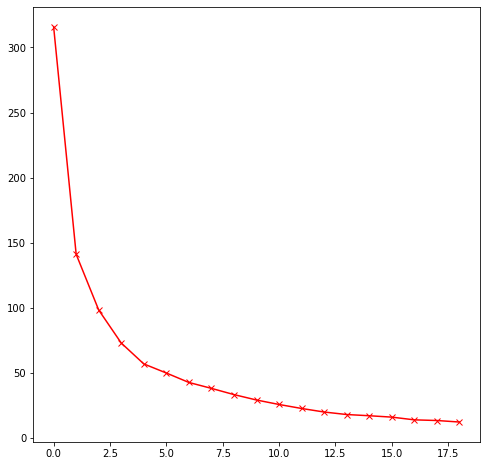

In [20]:
x = df
x = x.drop("Country", axis=1)
x = x.drop("Happiness Rank", axis=1)
x = x.drop("Region", axis=1)
x = x[['Happiness Score', 'Freedom']] #removing non-numeric data
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
x_2d = pca.fit_transform(x)
plt.figure(figsize=(8, 8))
#a = plt.plot(x_2d[:,0],x_2d[:,1],"bx")

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='r', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_clusters(clusterer, X):
    labels = clusterer.predict(X)
    pca = PCA(n_components=2)
    x_2d = pca.fit_transform(X)
    plt.scatter(x_2d[:, 0], x_2d[:, 1], c=labels, alpha=0.3)
    plot_centroids(clusterer.cluster_centers_)
    
scores=[]
for i in range(1,20):
    #Fit for k
    means=KMeans(n_clusters=i)
    means.fit(x)
    #Get inertia
    scores.append(means.inertia_)
plt.plot(scores,"-rx")

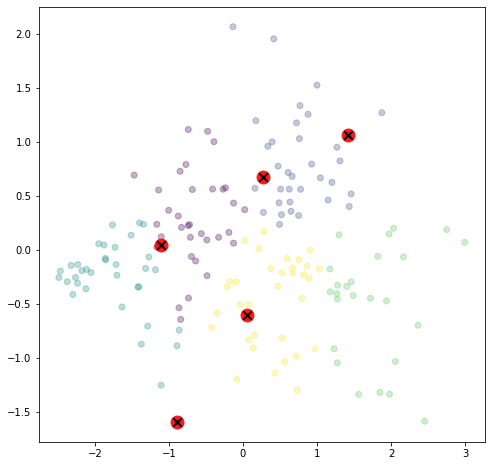

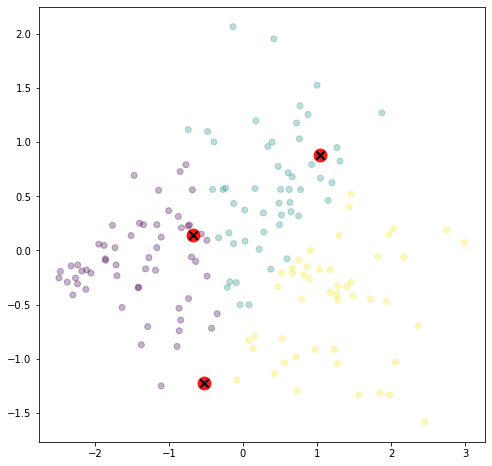

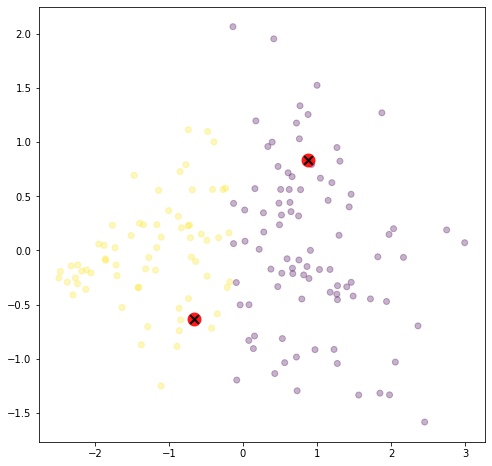

In [21]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x)
plt.figure(figsize=(8, 8))
#Plot clusters onto PCA reduced plot
plot_clusters(kmeans, x)

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x)
plt.figure(figsize=(8, 8))
#Plot clusters onto PCA reduced plot
plot_clusters(kmeans, x)

k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x)
plt.figure(figsize=(8, 8))
#Plot clusters onto PCA reduced plot
plot_clusters(kmeans, x)

Looking at the elbow plot we can assume that the best k-value would be 2, which makes sense considered the clustering isn't particuarly clear. 

Text(0.5, 0, 'cluster number')

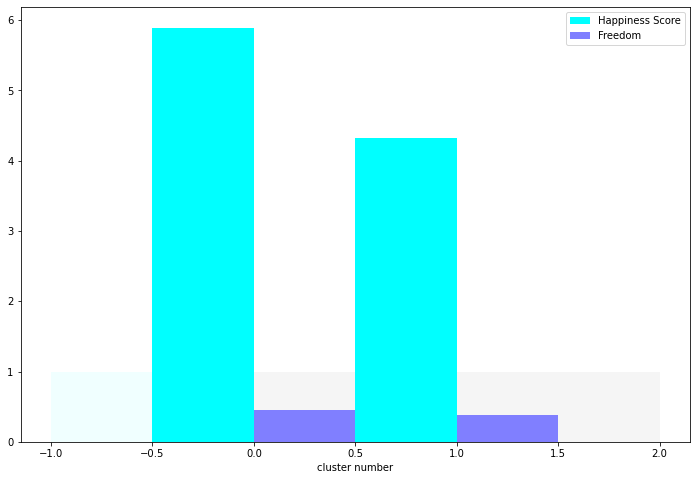

In [22]:
labels = kmeans.predict(x_less_dimensions)
df["cluster"] = labels

#Pick some features to plot
features = ['Happiness Score', 'Freedom']
width = 1/(len(features))

fig,ax = plt.subplots(figsize=(12, 8))

for i in range(k):
    ax.bar([i],[1],width=width*4,color = "azure" if i%2==0 else "whitesmoke")

cmap = plt.cm.get_cmap('cool')
#Iterate through features
for index, f in enumerate(features):
    #Get mean for each feature for each cluster
    data = [np.mean(df[df["cluster"]==i][f]) for i in range(k)]
    
    x_vals = np.arange(len(data)) + (width*index) - 0.5 + width/2
    
    #Plot this feature for each cluster
    ax.bar(x_vals, data, width = width, label = f, color = cmap(index/len(features)))
    
ax.legend()
ax.set_xlabel("cluster number")

There isn't a huge difference in the bar chart above for the freedom mean even when the happiness score has increased, leading me to assume that freedom isn't a huge factor in altering the happiness of a specific country. This could be because the term happiness is vague and subjective, leading to unreliable results or that freedom isn't as heavy a factor on happiness. 

Text(0.5, 0, 'cluster number')

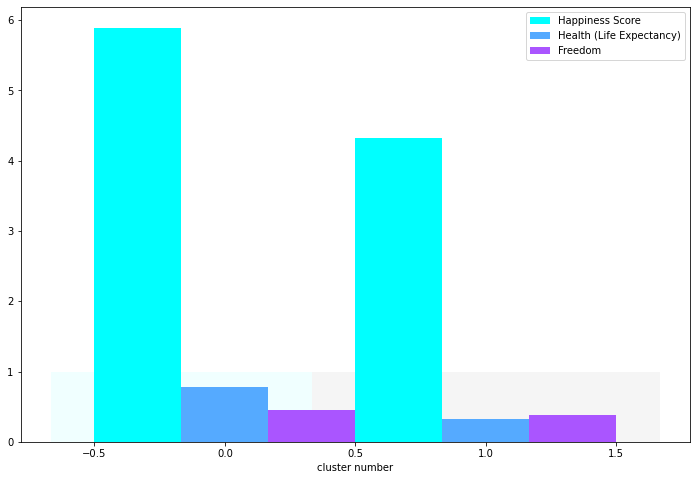

In [23]:
#Pick some features to plot
features = ['Happiness Score', 'Health (Life Expectancy)', 'Freedom']
width = 1/(len(features))

fig,ax = plt.subplots(figsize=(12, 8))

for i in range(k):
    ax.bar([i],[1],width=width*4,color = "azure" if i%2==0 else "whitesmoke")

cmap = plt.cm.get_cmap('cool')
#Iterate through features
for index, f in enumerate(features):
    #Get mean for each feature for each cluster
    data = [np.mean(df[df["cluster"]==i][f]) for i in range(k)]
    
    x_vals = np.arange(len(data)) + (width*index) - 0.5 + width/2
    
    #Plot this feature for each cluster
    ax.bar(x_vals, data, width = width, label = f, color = cmap(index/len(features)))
    
ax.legend()
ax.set_xlabel("cluster number")

In contrast with the graph before it there is some relationship with the increase in happiness with life expectancy, so we can conclude that while freedom has little impact people's happiness there is a positive correlation with life expectancy and happiness. 

Text(0.5, 0, 'cluster number')

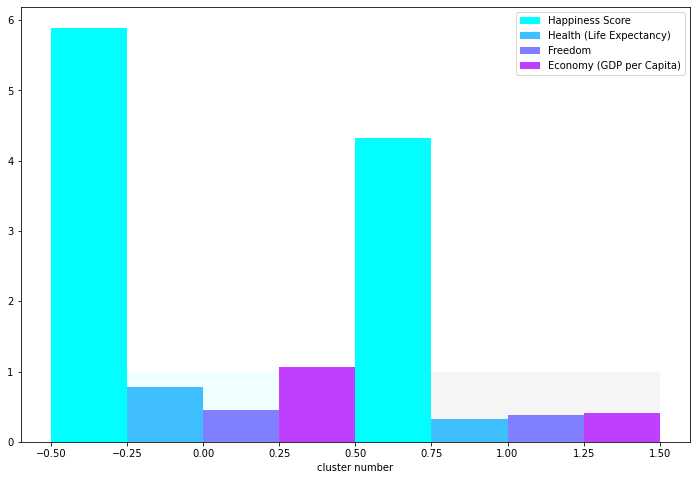

In [24]:
#Pick some features to plot
features = ['Happiness Score', 'Health (Life Expectancy)', 'Freedom', 'Economy (GDP per Capita)']
width = 1/(len(features))

fig,ax = plt.subplots(figsize=(12, 8))

for i in range(k):
    ax.bar([i],[1],width=width*4,color = "azure" if i%2==0 else "whitesmoke")

cmap = plt.cm.get_cmap('cool')
#Iterate through features
for index, f in enumerate(features):
    #Get mean for each feature for each cluster
    data = [np.mean(df[df["cluster"]==i][f]) for i in range(k)]
    
    x_vals = np.arange(len(data)) + (width*index) - 0.5 + width/2
    
    #Plot this feature for each cluster
    ax.bar(x_vals, data, width = width, label = f, color = cmap(index/len(features)))
    
ax.legend()
ax.set_xlabel("cluster number")

Looking at this plot we could take away that of the variables I've looked at, the economy has the biggest impact on happiness, considering money dictates how much people can do, e.g. holidays, days out, nicer food, it is understandable to see why there is some relationship, the GDP of a country has real tangible and felt effects on people.